In [51]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math



In [52]:
#image data format [# images , row , col , color_ch]
#Label data format [# images , row , col , color_ch]
class data:    
    class train:       
        path='/home/ubuntu/Notebooks/seongjung/MNIST_np_28/'
        images=np.load(path+"train_img.npy")
        labels=np.load(path+"train_lab.npy")
        cls=np.zeros([len(labels)])
        print 'a';
        for i,ele in enumerate(labels):
            cls[i]=np.argmax(ele)
        @staticmethod
        def next_batch(batch_size, image, label):
            a = np.random.randint(np.shape(image)[0]-batch_size)
            batch_x = image[a:a+batch_size,:]
            batch_y = label[a:a+batch_size,:]
            return batch_x, batch_y
# batch_x, batch_y = next_batch(batch_size,train_img,train_label)
# 함수는 이런식으로 사용한다 .
# train_img 을 넣어주는데 이미지가 
# image 이차원 행렬중에 행은 batch_size 까지 만들고 
# 그 다음은 다 표시해준다.
    class test:
        path='/home/ubuntu/Notebooks/seongjung/MNIST_np_28/'
        images=np.load(path+"test_img.npy")
        labels=np.load(path+"test_lab.npy")
        cls=np.zeros([len(labels)])
        print 'a';
        for i,ele in enumerate(labels):
            cls[i]=np.argmax(ele)        
        @staticmethod
        def next_batch( batch_size, image, label):
            a = np.random.randint(np.shape(image)[0]-batch_size)
            batch_x = image[a:a+batch_size,:]
            batch_y = label[a:a+batch_size,:]
            return batch_x, batch_y 
    class val:
        path='/home/ubuntu/Notebooks/seongjung/MNIST_np_28/'
        images=np.load(path+"val_img.npy")
        labels=np.load(path+"val_lab.npy")
        cls=np.zeros([len(labels)])
        
        print 'a';
        for i,ele in enumerate(labels):
            cls[i]=np.argmax(ele)
        @staticmethod
        def next_batch( batch_size, image, label):
            a = np.random.randint(np.shape(image)[0]-batch_size)
            batch_x = image[a:a+batch_size,:]
            batch_y = label[a:a+batch_size,:]
            return batch_x, batch_y 
        
        

a
a
a


In [53]:
print data.train.cls
print np.shape(data.train.cls)
print data.test.cls
print data.val.cls


[ 7.  3.  4. ...,  5.  6.  8.]
(55000,)
[ 7.  2.  1. ...,  4.  5.  6.]
[ 5.  0.  4. ...,  2.  1.  2.]


In [7]:
train_img=data.train.images
train_lab=data.train.labels
val_img=data.val.images
val_lab=data.val.labels
test_img=data.test.images
test_lab=data.test.labels

train_lab

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [8]:
input_ch=1;
n_classes=10;
w_row=5; w_col=5;

input_ch=1
output_ch1=200
output_ch2=300
output_fc1=128

In [9]:
#Verify img_row , img_col

if len(np.shape(test_img)) ==2 : #n_files, img_row*img_col,
    n_img,rowXcol=np.shape(test_img)
    img_row=int(math.sqrt(rowXcol))
    img_col=img_row;
elif len(np.shape(test_img))==4: # n_files, img_row , img_col , input_ch
    img_row = np.shape(test_img)[1]
    img_col = np.shape(test_img)[2]
    
print "Image row : {0} , col : {1}".format( img_row , img_col)

Image row : 28 , col : 28


In [10]:
print ("Size of:")
print ("- Training Set: \t\t{}".format(len(data.train.labels)))
print ("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.val.labels)))

Size of:
- Training Set: 		55000
- Test-set:		10000
- Validation-set:	5000


In [11]:

#원하는 개수의 이미지를 보여줍니다.
def plot_images(images , lab , n,fig_size ,cls_pred=None):
    img_rowxcol = np.shape(images)[1]
    img_row=int(math.sqrt(img_rowxcol))
    img_col = img_row
    mat_row =int(math.sqrt(n))
    mat_col=mat_row
    print 'mat row , col :',mat_row , mat_col
    fig, axes = plt.subplots(mat_row , mat_col)
    fig = plt.subplots_adjust(hspace=0.3 , wspace=0.3 )
    for i ,ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_row , img_col),cmap='binary')
        if cls_pred is None:
            xlabel="True: {0}".format(lab[i])
        else:
            xlabel="True: {0} pred: {1}".format(lab[i] , cls_pred[i] )
        
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [12]:
def new_weights(shape):
    with tf.device('/gpu:1'):
        return tf.Variable(tf.truncated_normal(shape, stddev=0.05))


In [13]:
def new_biases(length):
    with tf.device('/gpu:1'):
        return tf.Variable(tf.constant(0.05 , shape=[length]))

In [14]:
def new_conv_layer(input , input_ch , w_row , w_col , output_ch , use_pooling=True ,dropout_rate=0.7):
    with tf.device('/gpu:1'):
        shape = [w_row , w_col , input_ch , output_ch ]
        weights=new_weights(shape)
        biases= new_biases(output_ch)
        layer=tf.nn.conv2d(input=input, filter=weights ,strides=[1,1,1,1] ,padding='SAME')
        layer += biases
        if use_pooling ==True:
            tf.nn.max_pool(value=layer , ksize = [1,2,2,1] ,strides=[1,2,2,1] ,padding='SAME')
        if dropout_rate!=0:
            tf.nn.dropout(layer , dropout_rate)
        layer=tf.nn.relu(layer)
    return layer, weights

        



In [15]:
def flatten_layer(layer):
    with tf.device('/gpu:1'):
        layer_shape = layer.get_shape()

        #layer_shape  has to be [ num_weights , num_heights  , img_width , img_channels]
        num_features=layer_shape[1:4].num_elements()
        print num_features
        layer_flat=tf.reshape( layer, [-1,num_features])
    return layer_flat , num_features

In [16]:
def new_fc_layer(input , num_inputs, num_outputs , use_relu=True):
    with tf.device('/gpu:1'):
        weights = new_weights( [num_inputs , num_outputs])
        biases = new_biases(num_outputs)
        layer=tf.matmul(input ,weights)+biases
        if use_relu==True:
            layer = tf.nn.relu(layer)
    return layer 



In [17]:
x= tf.placeholder(tf.float32 , shape=[None , img_row*img_col*input_ch] , name = 'x')
x_image = tf.reshape(x , [-1 , img_row , img_col , input_ch])
y_ = tf.placeholder(tf.float32 , shape=[None , n_classes ])
y_cls = tf.argmax(y_ , dimension=1)



# Make Layer

In [18]:
layer_conv1 , weights_conv1 = new_conv_layer(x_image, input_ch,w_row ,w_col,output_ch1)

In [19]:
layer_conv2 , weights_conv2 = new_conv_layer(layer_conv1 , output_ch1 , w_row , w_col , output_ch2 )

In [20]:
layer_flat , flatted_output_ch2= flatten_layer(layer_conv2)

235200


In [21]:
layer_fc1 = new_fc_layer(layer_flat,  flatted_output_ch2, output_fc1)


In [22]:
layer_fc2 = new_fc_layer(layer_fc1 ,  output_fc1 , n_classes)


In [23]:
y_pred=tf.nn.softmax(layer_fc2)

In [24]:
y_pred_cls = tf.argmax(y_pred, dimension =1)

In [25]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2 , labels=y_)


In [26]:
cost = tf.reduce_mean(cross_entropy )

In [27]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.004).minimize(cost)


In [28]:
correct_prediction = tf.equal(y_pred_cls , y_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction , tf.float32))



In [29]:
session = tf.Session()
session.run(tf.initialize_all_variables())

In [30]:
batch_size=64;
total_iterations =0

def optimize(num_iterations , train_img , train_lab , val_img , val_lab):
    global total_iterations
    start_time = time.time()

    for i in range(total_iterations , total_iterations + num_iterations ):
        x_train_batch , y_train_batch = data.train.next_batch(batch_size , train_img, train_lab )
        x_val_batch , y_val_batch = data.val.next_batch(batch_size , val_img, val_lab )
        
        session.run(optimizer , feed_dict = {x: x_train_batch , y_: y_train_batch})
        if i%100 ==0:
            train_acc=session.run(accuracy ,  feed_dict = {x: x_train_batch , y_: y_train_batch}) # training accuracy 
            val_acc=session.run(accuracy , feed_dict = {x: x_val_batch , y_: y_val_batch})
            msg = "Optimization Iteration : {0:>6} , Training Accuracy: {1:6.1%} validation Accuracy : {2:6.1%}"
            print (msg.format(i +1,train_acc , val_acc))
            total_iterations +=num_iterations 
            end_time = time.time()
            time_dif = end_time - start_time
            print ("Time usage:" + str(timedelta(seconds=int(round(time_dif)))))
            


In [31]:
def plot_example_errors(cls_pred ,correct):
    incorrect = (correct ==False)
    images = data.test.images[incorrect]
    cls_pred = cls_pred[incorrect]
    cls_true = data.test.cls[incorrect]
    plot_images(images= images[0:9],
               cls_true=cls_true[0:9],
               cls_pred=cls_pred[0:9])
    

In [32]:
def plot_confusion_matrix(n_class,cls_true ,cls_pred):
    
    cm =  confusion_matrix(y_true = cls_true , y_pred = cls_pred)
    print cm
    plt.matshow(cm)
    plt.colorbar()
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks , range(n_classes))
    plt.yticks(tick_marks , range(n_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()
    
    

In [33]:
test_batch_size=60
def print_test_accuracy(show_example_errors= False, show_confusion_matrix=False):
    n_test = len(data.test.images)
    cls_pred = np.zeros(n_test , dtype = np.int)
    i=0
    while i<n_test:
        j = min(i+test_batch_size , n_test)    
        images = data.test.images[i:j , :]
        labels= data.test.labels[i:j, :]
        cls_pred[i:j] = session.run(y_pred_cls , feed_dict={x:images , y_: labels})
        #print cls_pred[i:j]
        i=j
    
    cls_true = data.test.cls
    print "cls_true",cls_true 
    print cls_pred
    correct = (cls_true  == cls_pred)
    print correct 
    correct_sum =correct.sum()
    acc = float(correct_sum) /n_test
    msg = "Accuracy on Test-set: {0:.1%}({1} /{2})"
    print (msg.format(acc , correct_sum , n_test))
    if show_example_errors:
        print ("Example errors:")
        plot_example_errors(cls_pred= cls_pred , correct = correct)
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred = cls_pred)
    
    
    
    

In [34]:
print_test_accuracy()

cls_true [ 7.  2.  1. ...,  4.  5.  6.]
[4 5 1 ..., 4 4 4]
[False False  True ...,  True False False]
Accuracy on Test-set: 14.3%(1434 /10000)


In [35]:
min(5,3)

3

In [36]:
print_test_accuracy()

cls_true [ 7.  2.  1. ...,  4.  5.  6.]
[4 5 1 ..., 4 4 4]
[False False  True ...,  True False False]
Accuracy on Test-set: 14.3%(1434 /10000)


mat row , col : 4 4


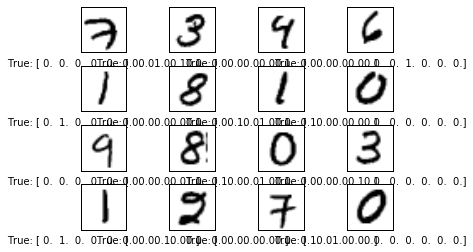

In [37]:
#test plot_images 
plot_images(train_img , train_lab , 16 , 3)


In [38]:
#showing moving kernel

a=[0,0,1]
np.argmax(a)





















2

In [39]:
optimize(200 , train_img , train_lab , val_img , val_lab)

Optimization Iteration :      1 , Training Accuracy:  20.3% validation Accuracy :   7.8%
Time usage:0:00:01
Optimization Iteration :    101 , Training Accuracy:  65.6% validation Accuracy :  59.4%
Time usage:0:00:06


In [40]:
print_test_accuracy()

cls_true [ 7.  2.  1. ...,  4.  5.  6.]
[0 2 1 ..., 0 8 6]
[False  True  True ..., False False  True]
Accuracy on Test-set: 69.4%(6938 /10000)


In [41]:
optimize(10000, train_img , train_lab ,val_img , val_lab)

Optimization Iteration :    401 , Training Accuracy:  62.5% validation Accuracy :  68.8%
Time usage:0:00:00
Optimization Iteration :    501 , Training Accuracy:  67.2% validation Accuracy :  60.9%
Time usage:0:00:05
Optimization Iteration :    601 , Training Accuracy:  68.8% validation Accuracy :  68.8%
Time usage:0:00:11
Optimization Iteration :    701 , Training Accuracy:  76.6% validation Accuracy :  68.8%
Time usage:0:00:16
Optimization Iteration :    801 , Training Accuracy:  68.8% validation Accuracy :  73.4%
Time usage:0:00:21
Optimization Iteration :    901 , Training Accuracy:  73.4% validation Accuracy :  71.9%
Time usage:0:00:27
Optimization Iteration :   1001 , Training Accuracy:  60.9% validation Accuracy :  73.4%
Time usage:0:00:32
Optimization Iteration :   1101 , Training Accuracy:  70.3% validation Accuracy :  64.1%
Time usage:0:00:37
Optimization Iteration :   1201 , Training Accuracy:  73.4% validation Accuracy :  68.8%
Time usage:0:00:43
Optimization Iteration :   1

In [42]:
optimize(50000, train_img , train_lab ,val_img , val_lab)

Optimization Iteration : 1000401 , Training Accuracy:  85.9% validation Accuracy :  90.6%
Time usage:0:00:00
Optimization Iteration : 1000501 , Training Accuracy:  93.8% validation Accuracy :  89.1%
Time usage:0:00:05
Optimization Iteration : 1000601 , Training Accuracy:  90.6% validation Accuracy :  93.8%
Time usage:0:00:11
Optimization Iteration : 1000701 , Training Accuracy:  87.5% validation Accuracy :  90.6%
Time usage:0:00:16
Optimization Iteration : 1000801 , Training Accuracy:  85.9% validation Accuracy :  87.5%
Time usage:0:00:22
Optimization Iteration : 1000901 , Training Accuracy:  90.6% validation Accuracy :  87.5%
Time usage:0:00:27
Optimization Iteration : 1001001 , Training Accuracy:  92.2% validation Accuracy :  89.1%
Time usage:0:00:32
Optimization Iteration : 1001101 , Training Accuracy:  93.8% validation Accuracy :  93.8%
Time usage:0:00:38
Optimization Iteration : 1001201 , Training Accuracy:  96.9% validation Accuracy :  92.2%
Time usage:0:00:43
Optimization Iterat

[[271   0   0   0   0   0   0   0   0   0]
 [  5 335   0   0   0   0   0   0   0   0]
 [  5   1 306   0   0   0   0   0   1   0]
 [  9   0   0 307   0   0   0   0   0   0]
 [ 13   0   0   0 301   0   3   0   0   1]
 [280   0   0   2   0   0   0   0   1   0]
 [ 10   1   0   0   0   0 261   0   0   0]
 [ 17   1   0   0   0   0   0 287   0   1]
 [  9   0   0   0   0   0   0   0 277   0]
 [ 15   1   0   0   2   0   0   0   1 276]]


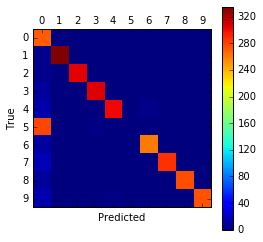

In [43]:
cls_pred=session.run(y_pred_cls , feed_dict={x:test_img[0:3000] , y_ : test_lab[0:3000]})
cls_true=data.test.cls
plot_confusion_matrix(10, cls_true[0:3000],cls_pred[0:3000])


In [73]:
#reshape test 
print np.shape(test_img)
img=np.reshape(test_img[3:4 , :] , (28,28))
plt.imshow(img, cmap = 'binary')
plt.savefig(dirname+'/a.jpg')


(10000, 784)


In [44]:
def plot_conv_images(dirname,ori_data,num_img,conv_name,conv_layer):
    if len(np.shape(ori_data)) ==2:
          img=ori_data[num_img : num_img+1 ,:]
          np.reshape(img)
    dirname+='/'
    conv_name +='/'
    dirname += conv_name
    os.mkdir(dirname)
    conv_shape=np.shape(conv_layer)
    conv_row= conv_shape[1]
    conv_col = conv_shape[2]
    assert len(conv_shape)==4
    count =0
    
    for j in range(conv_shape[3]):
        img=conv_layer[num_img:num_img+1: , : ,:, j:j+1]
        img=img.reshape(conv_shape[1],conv_shape[2])
        plot_img= plt.imshow(img , cmap='binary')
        plt.savefig(dirname +'/' +str(count)+'.jpg',)
        count += 1
"""#원하는 개수의 이미지를 보여줍니다.
def plot_images(images , lab , n,fig_size ,cls_pred=None):
    img_rowxcol = np.shape(images)[1]
    img_row=int(math.sqrt(img_rowxcol))
    img_col = img_row
    mat_row =int(math.sqrt(n))
    mat_col=mat_row
    print 'mat row , col :',mat_row , mat_col
    fig, axes = plt.subplots(mat_row , mat_col)
    fig = plt.subplots_adjust(hspace=0.3 , wspace=0.3 )
    for i ,ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_row , img_col),cmap='binary')
        if cls_pred is None:
            xlabel="True: {0}".format(lab[i])
        else:
            xlabel="True: {0} pred: {1}".format(lab[i] , cls_pred[i] )
        
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()"""

'#\xec\x9b\x90\xed\x95\x98\xeb\x8a\x94 \xea\xb0\x9c\xec\x88\x98\xec\x9d\x98 \xec\x9d\xb4\xeb\xaf\xb8\xec\xa7\x80\xeb\xa5\xbc \xeb\xb3\xb4\xec\x97\xac\xec\xa4\x8d\xeb\x8b\x88\xeb\x8b\xa4.\ndef plot_images(images , lab , n,fig_size ,cls_pred=None):\n    img_rowxcol = np.shape(images)[1]\n    img_row=int(math.sqrt(img_rowxcol))\n    img_col = img_row\n    mat_row =int(math.sqrt(n))\n    mat_col=mat_row\n    print \'mat row , col :\',mat_row , mat_col\n    fig, axes = plt.subplots(mat_row , mat_col)\n    fig = plt.subplots_adjust(hspace=0.3 , wspace=0.3 )\n    for i ,ax in enumerate(axes.flat):\n        ax.imshow(images[i].reshape(img_row , img_col),cmap=\'binary\')\n        if cls_pred is None:\n            xlabel="True: {0}".format(lab[i])\n        else:\n            xlabel="True: {0} pred: {1}".format(lab[i] , cls_pred[i] )\n        \n        ax.set_xlabel(xlabel)\n        ax.set_xticks([])\n        ax.set_yticks([])\n    plt.show()'

In [48]:
import os
conv1=session.run(layer_conv1 ,  feed_dict={x:test_img[0:3000] , y_ : test_lab[0:3000]})
conv2=session.run(layer_conv2 ,  feed_dict={x:test_img[0:3000] , y_ : test_lab[0:3000]})

dirname='/media/ubuntu/새 볼륨/data/MNIST/result'
plot_conv_images(dirname,3 , 'conv1',conv1  )
plot_conv_images(dirname,3 , 'conv2',conv2  )
